# Exercise 7.3
### Introduction
Use piano.txt for this exercise.

A) Do a fast Fourier transform on the file. 
B) Figure out what note was played. 

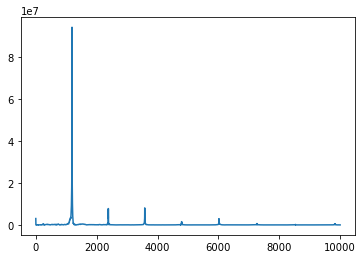

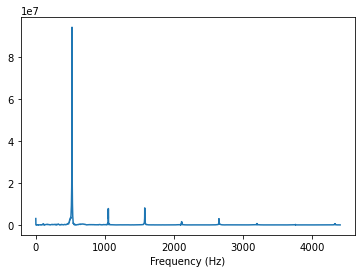

The peak is at 525 Hz


In [52]:
import matplotlib.pyplot as plt
import numpy as np
N = 10000
y = np.loadtxt('http://www-personal.umich.edu/~mejn/cp/data/piano.txt')
c = np.fft.rfft(y)
plt.plot(abs(c[:N]))
plt.show()
fs = 44100
f = np.arange(0,len(c)*fs/len(y),fs/len(y))
plt.plot(f[:N],abs(c[:N]))
plt.xlabel('Frequency (Hz)')
plt.show()
print(f'The peak is at {f[list(c).index(max(c))]:.0f} Hz')

### Conclusion
According to a chart I found online, this note is $C_5$, an octave above middle C. I am very glad this numpy library exists.

# Exercise 7.4
### Introduction
Use the dow.txt file

A) Read it in and plot it

B) Use rrft from numpy.fft to do a Fourier transform

C) Only keep the first 10%

D) Calculate inverse Fourier transform with irfft and plot it on the same graph as before. 

E) Do it again but with 2%

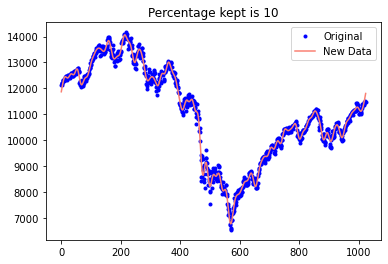

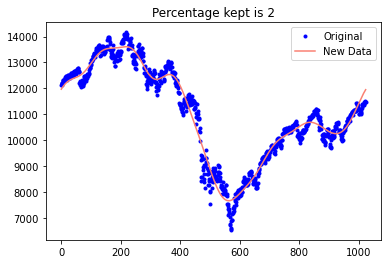

In [33]:
import matplotlib.pyplot as plt
import numpy as np
#Part A
data = np.loadtxt('http://www-personal.umich.edu/~mejn/cp/data/dow.txt')  #Reads in data
plt.plot(data,'b.',label = 'Original')  #Plots data

#Part B
c = np.fft.rfft(data)  #Runs fast Fourier Transform

#Part C
percentage = 10   #What percent you want to keep
c[int(len(c)*percentage/100):] = 0  #Sets all after the percentage to be 0

#Part D
new_data = np.fft.irfft(c)   #Inverse Fourier transform
plt.plot(new_data, color='salmon',label='New Data')
plt.legend()
plt.title(f'Percentage kept is {percentage}')
plt.show()

#Part E
data = np.loadtxt('http://www-personal.umich.edu/~mejn/cp/data/dow.txt')  #Reads in data
plt.plot(data,'b.',label = 'Original')  #Plots data

c = np.fft.rfft(data)  #Runs fast Fourier Transform

percentage = 2   #What percent you want to keep
c[int(len(c)*percentage/100):] = 0  #Sets all after the percentage to be 0

new_data = np.fft.irfft(c)   #Inverse Fourier transform
plt.plot(new_data, color='salmon',label='New Data') #Plots it
plt.legend()
plt.title(f'Percentage kept is {percentage}')
plt.show()

### Conclusion
Setting the later parts of the transform to be zero gets rid of a lot of noise in the data. It simplifies it a lot, but could simplify it too much (as seen in the second one). 

# In Class FFT
### Introduction
Do what we did last week, but with fast Fourier transform. I did pitch.txt for my file.

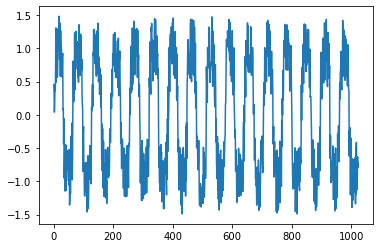

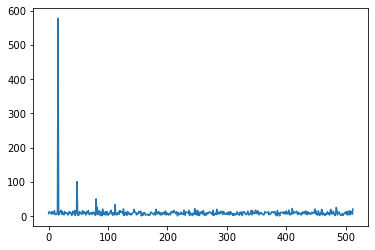

Wall time: 356 ms


In [58]:
%%time
y = np.loadtxt('http://www-personal.umich.edu/~mejn/cp/data/pitch.txt')
plt.plot(y)
plt.show()
c = np.fft.rfft(y)
plt.plot(abs(c))
plt.show()

Last Week's below for comparison

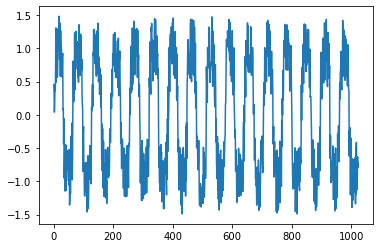

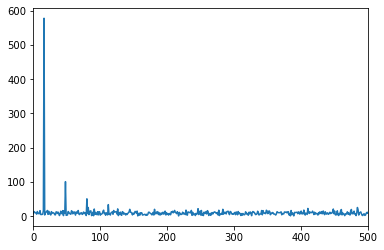

Wall time: 3.42 s


In [59]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm

def dft(y):
    N = len(y)
    c = np.zeros(N//2 + 1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*cm.exp(-2j*cm.pi*k*n/N)
    return c

data = np.loadtxt("pitch.txt")
plt.plot(data)
plt.show()
c = dft(data)
plt.plot(abs(c))
plt.xlim(0,500)
plt.show()

### Conclusion
This saves so much time! That is crazy! It is a tenth of the time.